<a href="https://colab.research.google.com/github/Aasawari0309/Machine-Learning/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files
files.upload() # Re-upload kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# Example for CalCOFI dataset
!kaggle datasets download -d sohier/calcofi
!unzip calcofi.zip

Dataset URL: https://www.kaggle.com/datasets/sohier/calcofi
License(s): other
  0% 0.00/50.4M [00:00<?, ?B/s]
100% 50.4M/50.4M [00:00<00:00, 665MB/s]
Archive:  calcofi.zip
  inflating: bottle.csv              
  inflating: cast.csv                


In [ ]:
#linear regression using sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split#validation technique
from sklearn.linear_model import LinearRegression

In [ ]:

df = pd.read_csv('bottle.csv')
df.head()


<ipython-input-13-a830ec74f67f>:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('bottle.csv')


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#creating a binary dataframa
df_binary= df[['Salnty','T_degC']]
df_binary.columns = ['Sal','Temp']
df_binary.head()

,Sal,Temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


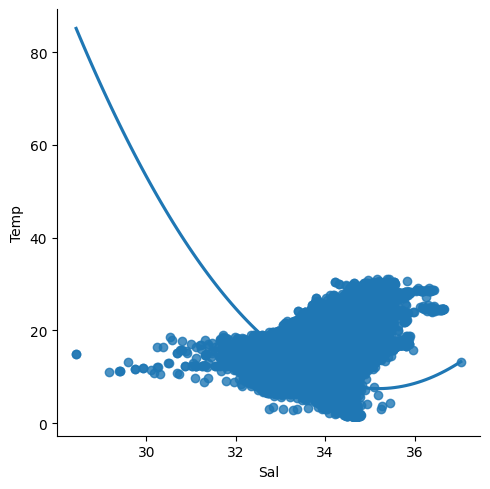

In [ ]:
#plotting the dataframe
sns.lmplot(x="Sal",y="Temp",data=df_binary,order=2 ,ci=None)

In [ ]:
df_binary.fillna(method= 'ffill',inplace=True)


<ipython-input-22-5446df5b3dce>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_binary.fillna(method= 'ffill',inplace=True)
<ipython-input-22-5446df5b3dce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.fillna(method= 'ffill',inplace=True)


In [ ]:
x=np.array(df_binary['Sal']).reshape(-1,1)
y=np.array(df_binary['Temp']).reshape(-1,1)

In [ ]:
#splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(x_test)
y_pred

array([[10.77414102],
       [ 8.58459992],
       [12.73731978],
       ...,
       [ 9.98804638],
       [ 8.30061809],
       [ 9.99957028]])

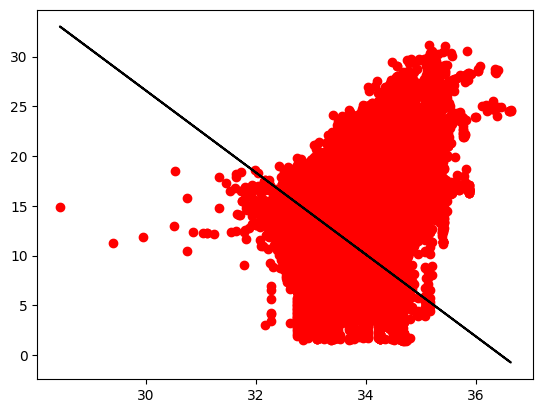

In [ ]:
plt.scatter(x_test,y_test,color="r")
plt.plot(x_test,y_pred,color= "k")
plt.show()

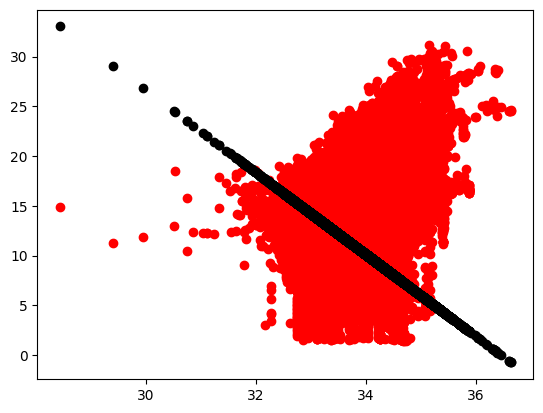

In [ ]:
plt.scatter(x_test,y_test,color="r")#this looks not so nice so plot is used
plt.scatter(x_test,y_pred,color= "k")
plt.show()